## Etapa 1: Importar bibliotecas, carregar e estudar os dados

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [37]:
df = pd.read_csv('../data/videogame_dataset.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12306,GRID 2,PC,2013.0,Racing,0.00,0.06,0.00,0.01,80.0,5.7,E
8306,Tokyo Xtreme Racer,DC,1999.0,Racing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
15745,NHL 2K3,GC,2002.0,Sports,0.01,0.00,0.00,0.00,89.0,7,E
16320,BlazBlue: Calamity Trigger,PC,2010.0,Fighting,0.00,0.01,0.00,0.00,NaN,8.7,T
8330,Gundam Assault Survive,PSP,2010.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,NaN
4407,LEGO Star Wars II: The Original Trilogy,XB,2006.0,Action,0.33,0.10,0.00,0.02,85.0,8.6,E10+
14245,Detective Conan: Phantom Rhapsody,3DS,2014.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1909,Disney's Lilo & Stitch,GBA,2002.0,Platform,0.77,0.29,0.00,0.02,NaN,NaN,NaN
7068,Super R-Type,SNES,1991.0,Shooter,0.00,0.00,0.23,0.00,NaN,NaN,NaN
1626,Vigilante 8,PS,1998.0,Racing,0.68,0.47,0.00,0.08,NaN,NaN,NaN


<!-- ## Etapa 2: Preparar os dados para análise -->

## Etapa 2: Preparar os dados para análise

Após análise inicial do dataset, as classificações abaixo foram criadas para garantir consistência, padronização e preparo adequado dos dados para as etapas subsequentes da análise.

#### Certezas:
- Padronizar nomes das colunas para letras minúsculas usando .lower() para facilitar a manipulação e manter consistência.
- Renomear other_sales para row_sales para refletir corretamente seu significado.
- Converter year_of_release de float para int, removendo previamente as poucas linhas com NaN para preservar integridade.
- Tratar a coluna user_score:
    - substituir 'tbd' por NaN, já que ambos representam ausência de avaliação,
    - converter para float,
    - utilizar -1 como placeholder temporário para valores ausentes, visando manter o tipo numérico para análises futuras.
- Criar a coluna global_sales somando as vendas de todas as regiões.

#### Talvez:
- Coluna rating (ESRB): manter os valores originais, mas possivelmente utilizar um dicionário descritivo ao gerar gráficos.
- Manter valores de vendas em milhões de dólares para evitar números muito extensos; revisar apenas se a forma de visualização exigir ajustes.

#### Reavaliar:
- Escalas de score (user e critic): decidir entre padronizar ambas para 0–10, 0–100 ou outra escala comum, dependendo do uso futuro nas análises.
- Tratamento de valores ausentes nas colunas de score e rating: avaliar se devem ser excluídos, mantidos ou preenchidos (média/mediana), conforme a relevância futura.

In [38]:
game_df = df.copy()
# colunas com nome minúsculo
game_df.columns = game_df.columns.str.lower()
# renomeando coluna other_sales
game_df = game_df.rename(columns={"other_sales": "row_sales"})
# lidando com os nulos e convertendo o dtype da coluna year_of_release
game_df = game_df.dropna(subset=["year_of_release"]).reset_index(drop=True)
game_df["year_of_release"] = game_df["year_of_release"].astype("int")
# substituindo os tbds por NaNs e convertendo o dtype da coluna user_score
game_df["user_score"] = game_df["user_score"].where(game_df["user_score"] != 'tbd', np.nan)
game_df["user_score"] = game_df["user_score"].astype("float")
# criando coluna com as vendas totais por jogo 
game_df['global_sales'] = game_df[["na_sales", "eu_sales", "row_sales", "row_sales"]].sum(axis=1)
# reorganizando as colunas para ter as colunas de sales lado a lado
cols = list(game_df.columns) 
row_index = cols.index('row_sales') 
col_to_move = cols.pop(cols.index('global_sales'))
cols.insert(row_index + 1, col_to_move)
game_df = game_df[cols]

game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,87.22,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,34.20,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.02,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.44,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,22.16,NaN,NaN,NaN


In [39]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   row_sales        16446 non-null  float64
 8   global_sales     16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           9768 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [40]:
# # COLUNA DE RATING - caso precise alterá-la/complementá-la para o reporte final
# rating_labels = {
#     "EC": "Early Childhood",
#     "E": "Everyone",
#     "E10+": "Everyone 10+",
#     "T": "Teen",
#     "M": "Mature 17+",
#     "AO": "Adults Only 18+",
#     "RP": "Rating Pending",
#     "K-A": "Kids to Adults"    
# }

# df['rating_clean'] = df['rating'].fillna("Unknown")
# df['rating_label'] = df['rating'].map(rating_labels)

As transformações aplicadas priorizaram integridade e coerência dos dados, garantindo que o dataset esteja pronto para análises posteriores. Ajustes adicionais foram deixados em aberto de forma intencional, dependendo da relevância dessas variáveis nos próximos estágios.

## Etapa 3: Analisar os dados

In [41]:
game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,87.22,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,34.20,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.02,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.44,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,22.16,NaN,NaN,NaN


#### A) Veja quantos jogos foram lançados a cada ano. Os dados de cada período são significativos?

In [42]:
games_per_year = (
    game_df
    .groupby('year_of_release')
    .size()
    .reset_index(name='games_count')
    .sort_values('games_count')
)

display(games_per_year.head(10))
games_per_year.describe().round(2)

,year_of_release,games_count
0,1980,9
4,1984,14
5,1985,14
8,1988,15
10,1990,16
7,1987,16
9,1989,17
3,1983,17
6,1986,21
2,1982,36


,year_of_release,games_count
count,37.00,37.00
mean,1998.00,444.49
std,10.82,451.56
min,1980.00,9.00
25%,1989.00,36.00
50%,1998.00,338.00
75%,2007.00,762.00
max,2016.00,1427.00


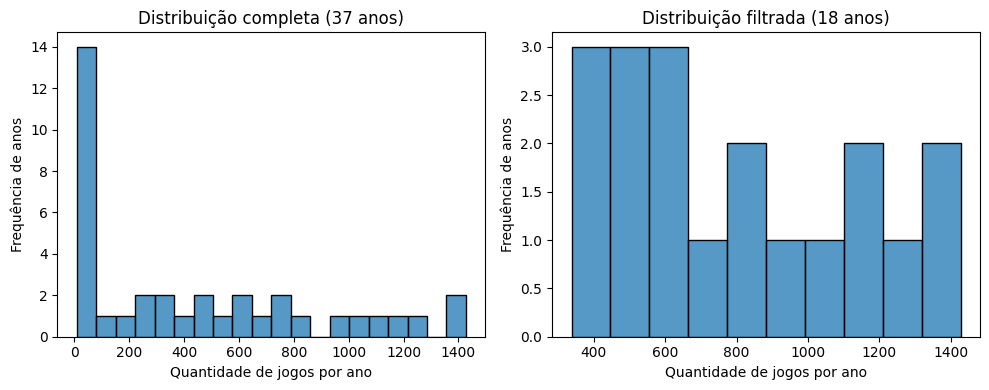

In [43]:
# criando histogramas com todos os dados do dataset e com filtro a partir da mediana
# criando o filtro
threshold = games_per_year["games_count"].median()
top_years = games_per_year[games_per_year["games_count"] >= threshold]

# criando os histogramas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# todos os dados
sns.histplot(
    data=games_per_year,
    x="games_count",
    bins=20,
    ax=axes[0]
)
axes[0].set_title("Distribuição completa (37 anos)")
axes[0].set_xlabel("Quantidade de jogos por ano")
axes[0].set_ylabel("Frequência de anos")

# dados filtrados
sns.histplot(
    data=top_years,
    x="games_count",
    bins=10,
    ax=axes[1]
)
axes[1].set_title("Distribuição filtrada (18 anos)")
axes[1].set_xlabel("Quantidade de jogos por ano")
axes[1].set_ylabel("Frequência de anos")

plt.tight_layout()
plt.show()


Os dados do dataset mostram um grande aumento no lançamento de jogos a partir dos anos 2000, com pico entre 2008-2010. Os anos anteriores são menos representativos, com 25% deles registrando 36 jogos ou menos. A diferença entre mediana (338) e média (444) indica uma distribuição assimétrica, puxada pelos anos com maior registros. Para evitar viés negativos na análise, os próximos passos devem concentrar-se no período de dados do dataset em que os lançamentos de jogos é maior e mais estável (anos 2000+).

A diferença visual entre os histogramas se dá pela quantidade do conjunto de dados. O histograma completo inclui todos os anos disponíveis (37), enquanto o histograma filtrado contém apenas os anos com volume acima da mediana (~18), por isso o gráfico filtrado naturalmente apresenta frequências menores. Essa diferença é esperada e reforça o motivo da filtragem: os anos de menor volume distorcem a distribuição e não são representativos para análises comparativas.

#### B) Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base nos dados para cada ano. Encontre as plataformas que costumavam ser populares, mas que agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [44]:
# analisando as vendas por plataforma
sales_by_platform = (
    game_df
    .groupby("platform")["global_sales"]
    .sum()
    .rename("total_sales")
    .sort_values(ascending=False)
)
# print(sales_by_platform)

# calculando a fatia de vendas de cada plataforma 
total_sales_sum = sales_by_platform.sum()
sales_share = sales_by_platform.cumsum() / total_sales_sum
platform_sales_share = pd.DataFrame({
    "total_sales": sales_by_platform,
    "cumulative_share": sales_share
})
# print(platform_sales_share)

# selecionando apenas as plataformas que correspondem a até 80% do total
top_platforms = platform_sales_share[
    platform_sales_share["cumulative_share"] <= 0.8
].index.tolist()
# print(top_platforms)

# filtrando o dataframe original com as top_platforms
top_platforms_df = game_df[game_df["platform"].isin(top_platforms)]

# agrupando os dados por platform e year_of_release e somando as global_sales
platform_year_sales = (
    top_platforms_df
    .groupby(["platform", "year_of_release"])["global_sales"]
    .sum()
    .reset_index(name="yearly_sales")
    .sort_values(["platform", "year_of_release"])
)
display(platform_year_sales)


,platform,year_of_release,yearly_sales
0,DS,1985,0.00
1,DS,2004,14.98
2,DS,2005,111.08
3,DS,2006,89.42
4,DS,2007,131.22
...,...,...,...
100,X360,2012,106.97
101,X360,2013,95.91
102,X360,2014,37.79
103,X360,2015,13.06


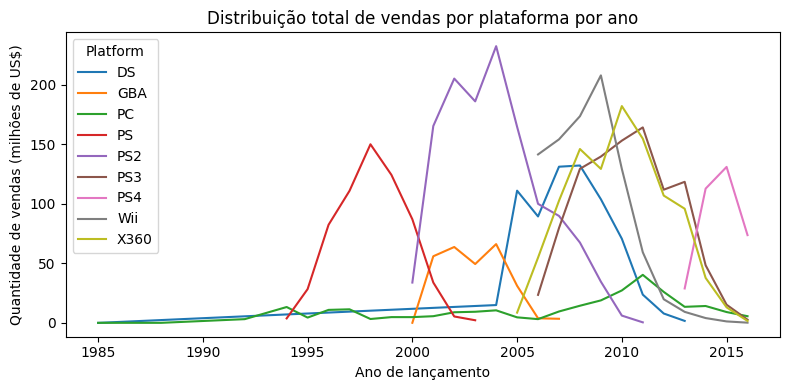

In [45]:
# visualizando a venda total de cada uma das top_platforms através dos anos
plt.figure(figsize=(8, 4))

sns.lineplot(
    data=platform_year_sales,
    x="year_of_release",
    y="yearly_sales",
    hue="platform",
    legend=True
)

plt.title("Distribuição total de vendas por plataforma por ano")
plt.xlabel("Ano de lançamento")
plt.ylabel("Quantidade de vendas (milhões de US$)")
plt.legend(title="Platform")

plt.tight_layout()
plt.show()

In [46]:
# para cada plataforma pegar first_year, last_year, lifespan (last - first year) e peak_year (max yearly_sales)
# top_platforms - ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC']
# platform_year_sales.head()

# pegando o primeiro, ultimo e ciclo de vida de cada plataforma
platform_lifecycle = (
    platform_year_sales
    .groupby('platform')
    .agg(
    first_year=("year_of_release", "min"),
    last_year=("year_of_release", "max")
)
)
platform_lifecycle["lifespan"] = (platform_lifecycle["last_year"] - platform_lifecycle["first_year"] + 1)
# display(platform_lifecycle)

# pegando o ano com maior venda de cada plataforma 
index_peak = (
    platform_year_sales
    .groupby('platform')["yearly_sales"]
    .idxmax()
    )

platform_peak_year = (
    platform_year_sales
    .loc[index_peak, :]
    .rename(columns={
        "year_of_release": "peak_year",
        "yearly_sales": "peak_sales"
    })
    .set_index('platform')
)
# display(platform_peak_year)

# juntando todos os dados em um único df
platform_summary = (
    platform_lifecycle
    .join(platform_peak_year, how='left')
    .sort_values('first_year')
)

display(platform_summary)

,first_year,last_year,lifespan,peak_year,peak_sales
platform,,,,,
DS,1985,2013,29,2008,132.24
PC,1985,2016,32,2011,40.36
PS,1994,2003,10,1998,150.06
GBA,2000,2007,8,2004,66.20
PS2,2000,2011,12,2004,232.49
X360,2005,2016,12,2010,182.15
PS3,2006,2016,11,2011,164.24
Wii,2006,2016,11,2009,207.94
PS4,2013,2016,4,2015,131.05


A tabela sumário nos mostra que as plataformas PS, GBA e DS foram bastante populares, porém desapareceram antes do período analisado (2016). As três plataformas tiveram picos relevantes de vendas que coincidentemente aconteceram 4 anós após seus lançamentos, mas foram aos poucos perdendo mercado para gerações de plataformas mais novas (como PS2, PSP). <br>
Adicionalmente, os ciclos de vida (coluna lifespan) de cada uma dessas plataformas de sucesso, desde seus lançamentos, pico de vendas e subsequentes desaparecimento, costumam durar entre 8 a 12 anos.


Observação: o dataset apresenta um erro na coluna year_of_release para a plataforma DS, registrando o lançamento do console na tabela sumário acima como 1985, quando, na realidade, esse console foi lançado em 2004. Para a análise, considerei apenas os anos em que o DS efetivamente possui vendas registradas (2004 para cima), refletindo seu ciclo de vida verdadeiro.

#### C) Determine para qual período você deve pegar dados. Para fazer isso, olhe para suas respostas das perguntas anteriores. Os dados devem permitir que você construa um modelo para 2017. Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.


In [47]:
# games_per_year.sort_values('games_count', ascending=False)

print("=*=*=*= TOTAL YEARS =*=*=*=")
display(games_per_year.describe(percentiles={0.5, 0.7, 0.8}))

print("=*=*=*= TOP YEARS =*=*=*=")
display(top_years.describe())

=*=*=*= TOTAL YEARS =*=*=*=


,year_of_release,games_count
count,37.000000,37.000000
mean,1998.000000,444.486486
std,10.824355,451.557159
min,1980.000000,9.000000
50%,1998.000000,338.000000
70%,2005.200000,615.400000
80%,2008.800000,818.200000
max,2016.000000,1427.000000


=*=*=*= TOP YEARS =*=*=*=


,year_of_release,games_count
count,19.000000,19.000000
mean,2007.000000,799.315789
std,5.627314,356.140430
min,1998.000000,338.000000
25%,2002.500000,523.000000
50%,2007.000000,762.000000
75%,2011.500000,1071.000000
max,2016.000000,1427.000000


In [48]:
# filtrando o dataframe para incluir apenas os dados referentes à lançamentos após 2005
df_2005_2016 = game_df[game_df["year_of_release"] >= 2005]
df_2005_2016.describe() 
# display(df_2005_2016.sample(10))


,year_of_release,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score
count,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,11272.000000,5645.000000,5538.000000
mean,2009.631831,0.233217,0.143463,0.054611,0.052638,0.481954,68.487865,6.914410
std,3.082748,0.750410,0.552300,0.252594,0.181365,1.584443,13.881781,1.503832
min,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.020000,60.000000,6.200000
50%,2009.000000,0.070000,0.020000,0.000000,0.010000,0.120000,70.000000,7.300000
75%,2012.000000,0.210000,0.100000,0.030000,0.040000,0.420000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,6.500000,8.450000,87.220000,98.000000,9.700000


A análise exploratória mostrou que os anos anteriores a 2005 apresentam um volume muito baixo de lançamentos e refletem um mercado ainda imaturo, com plataformas já descontinuadas ou irrelevantes para uma previsão futura. A distribuição anual de jogos, os histogramas e os percentis analisados indicam que a indústria se estabiliza a partir de 2005, quando o número de lançamentos cresce de forma consistente e as plataformas modernas entram no mercado (X360, Wii, PS3, PS4).

Assim, para construir um modelo que ajude a prever o desempenho em 2017, é mais adequado utilizar apenas os dados entre 2005 e 2016. Esse intervalo concentra a maior parte das vendas, contém plataformas ainda ativas e representa de forma fiel o comportamento recente do mercado global de videogames.

#### D) Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [49]:
platform_summary.sort_values('last_year', ascending=False)

# criando listas das plataformas a selecionar para previsão
prediction_platforms = ["PC", "PS4", "3DS"]
pred_optional_platforms = ["PC", "PS4", "3DS", "PS3", "X360"]

Ao analisar o ciclo de vida das plataformas (ano de início, ano final, pico de vendas e duração), observou-se que várias plataformas atingiram seu auge e desapareceram antes do final do período analisado, como PS, GBA, DS, PS2, Wii e PSP. Escolhi PS4, PC e 3DS como as plataformas principais para análise prospectiva porque todas permanecem ativas até 2016, apresentam vendas consistentes e não chegaram ao final de seu ciclo de vida. Essas plataformas ainda possuem potencial de crescimento e relevância no mercado em 2017.

Dessa forma, as plataformas mais recomendadas para previsões são: </br>
	- PS4 – plataforma nova, em crescimento, e ainda longe do final de seu ciclo de vida. </br>
	- PC – plataforma contínua, sem ciclo definido, com mercado estável e permanente. </br>
	- 3DS – ainda ativa e com vendas relevantes até 2016. </br>

Plataformas opcionais, por estarem em declínio mas ainda presentes em 2016: </br>
	- PS3 </br>
	- X360

#### E) Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

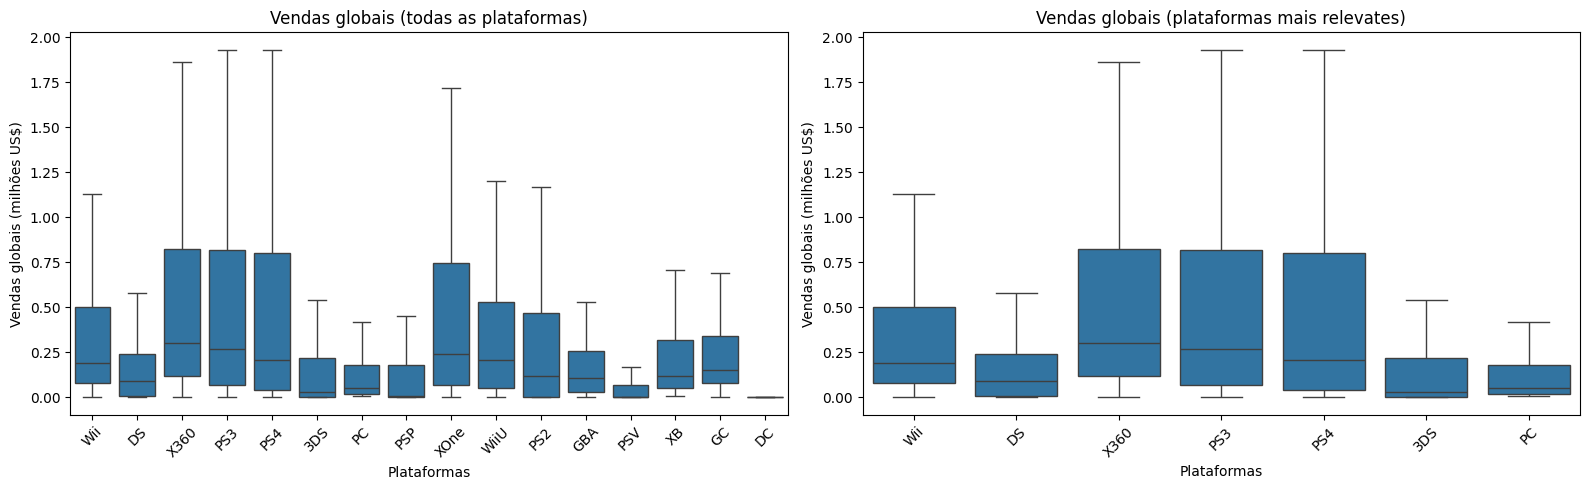

In [50]:
# boxplots totas plataformas vs plataformas filtradas
description_platforms = ['PC', 'PS4', '3DS', 'PS3', 'X360', 'Wii', 'DS']

plt.figure(figsize=(16, 5))

# boxplot 1: todas as plataformas
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_2005_2016,
    x='platform',
    y='global_sales',
    showfliers=False # para não exibir os outliers
)

plt.title('Vendas globais (todas as plataformas)')
plt.xlabel('Plataformas')
plt.xticks(rotation=45)
plt.ylabel('Vendas globais (milhões US$)')

# boxplot 2: plataformas filtradas
mask_platforms = df_2005_2016[df_2005_2016["platform"].isin(description_platforms)]
plt.subplot(1, 2, 2)
sns.boxplot(
    data=mask_platforms,
    x='platform',
    y='global_sales',
    showfliers=False
)

plt.title('Vendas globais (plataformas mais relevates)')
plt.xlabel('Plataformas')
plt.xticks(rotation=45)
plt.ylabel('Vendas globais (milhões US$)')

plt.tight_layout()
plt.show()

In [51]:
# visualizando as vendas médias (e mediana) por plataforma
print('=*=*=*=*=*= TODAS PLATAFORMAS =*=*=*=*=*=')
display(df_2005_2016.groupby('platform')['global_sales'].describe(percentiles={.5}).round(2).sort_values('mean', ascending=False))
# display(df_2005_2016.groupby('platform')['global_sales'].describe(percentiles={.5}).round(2).sort_values('max', ascending=False))
print('=*=*=*=*=*= PLATAFORMAS RELEVANTES =*=*=*=*=*=')
display(mask_platforms.groupby('platform')['global_sales'].describe(percentiles={.5}).round(2).sort_values('mean', ascending=False))


=*=*=*=*=*= TODAS PLATAFORMAS =*=*=*=*=*=


,count,mean,std,min,50%,max
platform,,,,,,
PS4,392.0,0.88,1.83,0.00,0.21,16.65
X360,1232.0,0.84,1.76,0.00,0.30,23.27
PS3,1306.0,0.76,1.58,0.00,0.27,24.03
Wii,1286.0,0.70,3.23,0.00,0.19,87.22
XOne,247.0,0.70,1.13,0.00,0.24,8.06
WiiU,147.0,0.51,0.93,0.00,0.21,6.32
PS2,1065.0,0.44,0.85,0.00,0.12,6.46
3DS,512.0,0.33,1.12,0.00,0.03,11.03
DS,2097.0,0.32,1.24,0.00,0.09,26.18


=*=*=*=*=*= PLATAFORMAS RELEVANTES =*=*=*=*=*=


,count,mean,std,min,50%,max
platform,,,,,,
PS4,392.0,0.88,1.83,0.00,0.21,16.65
X360,1232.0,0.84,1.76,0.00,0.30,23.27
PS3,1306.0,0.76,1.58,0.00,0.27,24.03
Wii,1286.0,0.70,3.23,0.00,0.19,87.22
3DS,512.0,0.33,1.12,0.00,0.03,11.03
DS,2097.0,0.32,1.24,0.00,0.09,26.18
PC,813.0,0.23,0.59,0.01,0.05,8.61


Os boxplots revelam diferenças claras e estruturais nas vendas globais entre as plataformas. Mesmo dentro do período filtrado (2005–2016), observamos que as distribuições são altamente assimétricas e apresentam muitos outliers — característica esperada do mercado de videogames, no qual poucos títulos alcançam vendas muito altas enquanto a maioria permanece em faixas baixas. </br>
As plataformas mais relevantes (PS4, PS3, X360, 3DS e PC) apresentam perfis distintos de vendas, com consoles de mesa concentrando títulos de maior impacto. As médias confirmam essas diferenças: PS4, PS3 e X360 exibem vendas superiores, enquanto PC e 3DS concentram mais jogos de vendas baixas, puxando suas médias para baixo.

#### F) Veja como as avaliações de usuários e profissionais afetam as vendas de uma das plataformas populares (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre avaliações e vendas.


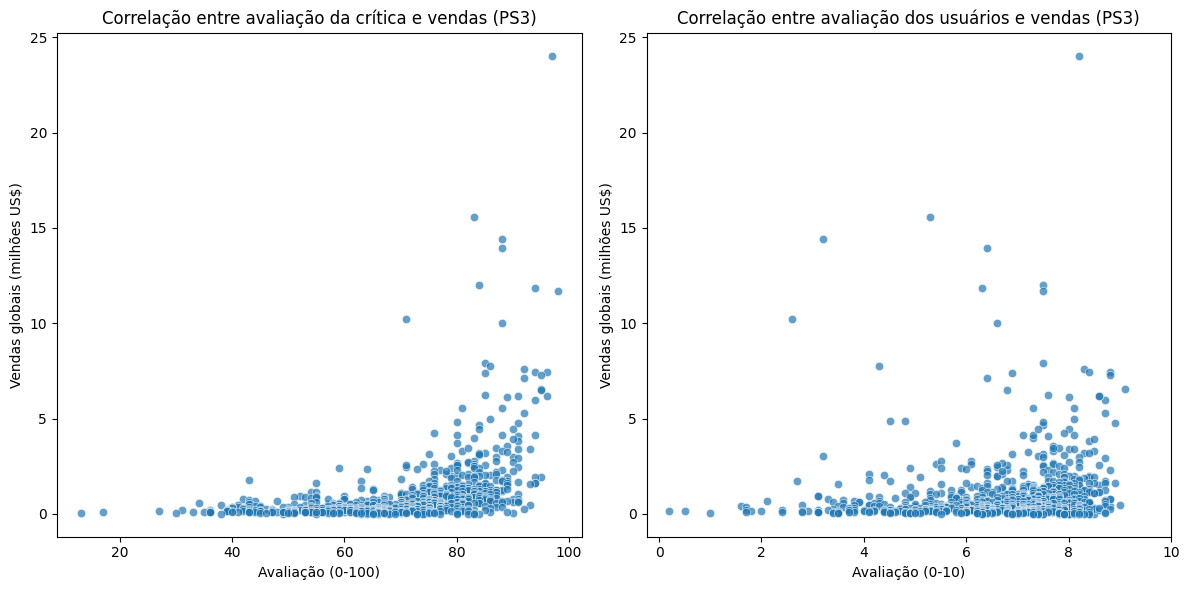

In [52]:
# platform_summary.sort_values('peak_sales', ascending=False)

# escolhendo PS3 para análise pois tem bastante vendas e permanece relevante em 2016
filtro_ps3 = df_2005_2016[df_2005_2016["platform"] == 'PS3']

plt.figure(figsize=(12, 6))

# SCATTER 1: AVALIAÇÃO CRÍTICOS
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=filtro_ps3,
    x='critic_score',
    y='global_sales',
    alpha=0.7
)

plt.title('Correlação entre avaliação da crítica e vendas (PS3)')
plt.xlabel('Avaliação (0-100)')
plt.ylabel('Vendas globais (milhões US$)')

# SCATTER 2: AVALIAÇÃO USUÁRIOS
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=filtro_ps3,
    x='user_score',
    y='global_sales',
    alpha=0.7
)

plt.title('Correlação entre avaliação dos usuários e vendas (PS3)')
plt.xlabel('Avaliação (0-10)')
plt.xticks(range(0, 11, 2))
plt.ylabel('Vendas globais (milhões US$)')

plt.tight_layout()
plt.show()

In [53]:
# calculando a correlação entre scores e sales
# filtro_ps3[["critic_score", "global_sales"]].corr()
# filtro_ps3[["user_score", "global_sales"]].corr()
filtro_ps3[["critic_score","user_score", "global_sales"]].corr().round(2)

,critic_score,user_score,global_sales
critic_score,1.00,0.63,0.43
user_score,0.63,1.00,0.12
global_sales,0.43,0.12,1.00


Os gráficos mostram que há uma correlação positiva e moderada (0.43) entre as avaliações da crítica e as vendas globais no PS3. Jogos com notas acima de 80 tendem a apresentar vendas mais altas, embora existam exceções. Já a correlação entre avaliações dos usuários e vendas é fraca (0.13), indicando que a nota dos usuários, por si só, não é um bom preditor de desempenho comercial.

Adicionalmente, as avaliações dos críticos e dos usuários têm correlação moderada entre si (0.63), sugerindo uma concordância razoável entre a percepção dos críticos e a do público — mas não total. No geral, a crítica parece ter mais relação com desempenho de vendas do que as avaliações dos jogadores.

#### G) Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.


In [54]:
# agrupando por jogo e verificando em quantas plataformas cada jogo foi lançado
game_grouping = (
    df_2005_2016
    .groupby('name')['platform']
    .count()
    .reset_index()
)

# filtrando apenas os jogos lançados em 2+ plataformas
multi_platform_games = game_grouping[game_grouping['platform'] >= 2]

# usando o filtro no df completo para analisar a diferença das vendas por jogo por plataforma
multi_platform_sales = df_2005_2016[df_2005_2016['name'].isin(multi_platform_games['name'])]
multi_platform_sales[['name', 'platform', 'global_sales']].sort_values('name')

,name,platform,global_sales
3312,Frozen: Olaf's Quest,3DS,0.64
3811,Frozen: Olaf's Quest,DS,0.55
14429,007: Quantum of Solace,PC,0.02
3079,007: Quantum of Solace,Wii,0.71
1273,007: Quantum of Solace,X360,1.61
...,...,...,...
4600,pro evolution soccer 2011,PS2,0.47
643,pro evolution soccer 2011,PS3,2.28
2547,pro evolution soccer 2011,PSP,0.67
8149,uDraw Studio: Instant Artist,Wii,0.19


In [55]:
# criando uma pivot table para comparar as vendas de cada jogo por plataforma
pivot_platform_sales = multi_platform_sales.pivot_table(
    index='name',
    columns='platform',
    values='global_sales',
    aggfunc='sum',
)

# apenas substituindo os NaNs por '-' para facilitar a visualização, sem alterar o df original para manter os dados como numéricos
display(pivot_platform_sales.fillna('-', inplace=False).sample(5))
pivot_platform_sales.describe().round(2)

platform,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,
Margot's Word Brain,-,0.09,-,-,-,-,-,-,-,-,0.14,-,-,-,-
MindJack,-,-,-,-,-,-,0.2,-,-,-,-,-,0.11,-,-
NHL 2K7,-,-,-,-,-,-,0.13,-,-,-,-,-,0.09,0.01,-
LEGO Marvel's Avengers,0.18,-,-,-,-,-,0.3,0.85,-,0.15,-,0.26,0.35,-,0.37
Dynasty Warriors 8,-,-,-,-,-,-,0.32,-,-,-,-,-,0.16,-,-


platform,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
count,133.00,506.00,50.00,115.00,438.00,532.00,1023.00,321.00,365.00,202.00,661.00,99.00,980.00,187.00,224.00
mean,0.27,0.37,0.24,0.24,0.25,0.65,0.81,0.97,0.37,0.10,0.54,0.30,0.86,0.26,0.66
std,0.56,0.57,0.28,0.29,0.62,1.00,1.64,1.94,0.76,0.20,0.98,0.50,1.64,0.34,1.10
min,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01
25%,0.03,0.09,0.04,0.08,0.02,0.12,0.12,0.06,0.02,0.00,0.11,0.05,0.14,0.06,0.06
50%,0.13,0.16,0.16,0.15,0.07,0.34,0.34,0.27,0.14,0.01,0.25,0.14,0.34,0.13,0.24
75%,0.30,0.42,0.30,0.28,0.22,0.64,0.88,0.92,0.42,0.12,0.59,0.40,0.90,0.32,0.70
max,5.60,5.22,1.16,1.59,8.61,6.46,24.03,16.65,9.17,1.30,11.18,4.44,17.62,2.05,8.06


A análise da pivot table mostra que jogos lançados em várias plataformas vendem significativamente mais em consoles domésticos (como PS4, PS3 e X360) do que em PC e portáteis (DS, DS3, PSP...). As três principais plataformas domésticas apresentam as maiores médias, medianas e terceiros quartis de vendas, além dos maiores valores máximos, indicando que contém tanto a base quanto os grandes sucessos. O PC e as plataformas portáteis possuem desempenho consistentemente inferior, com medianas e Q3 muito menores. </br>
Em suma, as vendas de jogos lançados em múltiplas plataformas são quase sempre dominadas pelos consoles domésticos.

#### H) Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [56]:
# agrupar por genero e somar global_sales para ver qual é mais lucrativo
genre_grouping = (
    df_2005_2016
    .groupby('genre')['global_sales']
    .sum()
    .reset_index()
)

genre_grouping.sort_values('global_sales', ascending=False)

,genre,global_sales
0,Action,1234.68
10,Sports,903.35
8,Shooter,826.75
3,Misc,607.77
7,Role-Playing,414.99
6,Racing,382.29
4,Platform,296.80
9,Simulation,261.61
2,Fighting,201.06
1,Adventure,132.58


Os três gêneros mais lucrativos são Action, Sports e Shooter, impulsionados por franquias de enorme alcance comercial (como Call of Duty, FIFA e GTA) e por modelos de lançamento frequentes, marketing agressivo e ampla disponibilidade multiplataforma. Os gêneros Misc (jogos híbridos e casuais, muito fortes em consoles como Wii e DS) e Platform (como Mario e Donkey Kong) também apresentam vendas elevadas, mas sua rentabilidade depende fortemente de poucos títulos de grande apelo, o que reduz a quantidade de lançamentos ao longo dos anos. Já os gêneros Adventure, Puzzle e Strategy aparecem com vendas mais baixas, refletindo tanto um volume menor de lançamentos quanto um público mais restrito e especializado, características que limitam seu potencial comercial.

### Conclusões gerais:

A análise dos dados entre 2005 e 2016 revela um mercado global já consolidado, no qual plataformas domésticas — especialmente PS4, PS3 e X360 — concentram a maior parte do volume de vendas e se destacam pelo desempenho superior dos jogos multiplataforma. A predominância dos gêneros Action, Sports e Shooter reflete um padrão de consumo orientado por franquias de grande apelo, forte presença multiplataforma e campanhas de marketing robustas, enquanto gêneros como Puzzle, Strategy e Adventure ocupam nichos menores, com impacto comercial limitado. As avaliações da crítica mostram correlação moderada com o desempenho em vendas, enquanto as avaliações dos usuários possuem relação mais fraca, indicando que fatores estruturais — plataforma, apelo de franquia e distribuição — exercem influência maior no sucesso comercial de um título.

A comparação entre versões multiplataforma reforça essa assimetria: consoles de mesa lideram consistentemente as vendas de um mesmo jogo, enquanto PC e dispositivos portáteis apresentam resultados inferiores tanto em média quanto em mediana. 

Definido esse panorama global, a próxima etapa é analisar como as diferenças regionais de mercado moldam o comportamento de vendas na América do Norte, Europa, Japão e demais regiões.

## Etapa 4: Criar um perfil para cada região e analisá-los

Para cada uma das quatro regiões, agrupei as vendas totais por plataforma, gênero, ano de lançamento e avaliações (profissionais e de usuários), seguindo a lógica construída na etapa 3 e garantindo material suficiente para comparar adequadamente os mercados regionais. Além disso, quatro mini-perfis serão apresentados, cada um contendo os 10 itens mais relevantes de cada categoria, para facilitar a comparação direta entre as regiões.

In [ ]:
# CRIANDO UMA FUNÇÃO PARA APLICAR O QUE FIZ NO JAPÃO NAS OUTRAS REGIÕES:
def plot_region_profile(region_profile: dict, region_name: str, sales_label: str):
    """
    Função que retorna dois gráficos de barras, um gráfico de linha e uma tabela comparativa.
    region_profile: deve ser um dicionário contendo as seguintes chaves:
        - 'top_platforms'   -> objeto Series onde index = plataforma, values = vendas
        - 'top_genres'      -> objeto Series onde index = gênero, values = vendas
        - 'sales_by_year'   -> objeto Series onde index = ano, values = vendas
        - 'top_games_scores'-> DataFrame com colunas:
            ['name', '<reg>_sales', 'critic_score', 'user_score']
            
    region_name: nome da região para usar nos títulos dos gráficos (ex: 'Japão', 'América do Norte')
    
    sales_label: rótulo para a coluna de vendas dessa região (ex: 'jp_sales', 'na_sales')
    """
    # GRÁFICOS DE BARRAS - plataformas e gêneros:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.barplot(
        x=region_profile['top_platforms'].values,
        y=region_profile['top_platforms'].index,
        orient='h'
    )
    plt.title(f"Top 10 plataformas em {region_name}")
    plt.xlabel("Vendas (milhões US$)")
    plt.ylabel("Plataforma")
    
    plt.subplot(1, 2, 2)
    sns.barplot(
        x=region_profile['top_genres'].values,
        y=region_profile['top_genres'].index,
        orient='h'
    )
    plt.title(f"Top 10 gêneros em {region_name}")
    plt.xlabel("Vendas (milhões US$)")
    plt.ylabel("Gênero")
    plt.tight_layout()
    plt.show()
    
    # GRÁFICO DE LINHA - vendas por ano:
    plt.figure(figsize=(8, 3))
    sns.lineplot(
        x=region_profile['sales_by_year'].index,
        y=region_profile['sales_by_year'].values,
    )
    plt.title(f"Evolução temporal das vendas em {region_name}")
    plt.xlabel("Ano")
    plt.ylabel("Vendas (milhões US$)")
    plt.tight_layout()
    plt.show()
    
    # TABELA AVALIAÇÕES - top jogos e as avaliações críticos e usuários:
    top_games = (
        region_profile["top_games_scores"]
        .fillna('-')
        .rename_axis("Jogo")
        .rename(columns={
            sales_label: "Vendas (milhões US$)",
            "critic_score": "Nota crítica",
            "user_score": "Nota usuários"
        })
    )
    print(f'Avaliações dos top jogos em {region_name}')
    display(top_games)
    

### Japão

In [57]:
# perfil japão
profile_jp = {
    # top 10 plataformas por vendas
    "top_platforms": (
        df_2005_2016
        .groupby("platform")["jp_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # top 10 gêneros por vendas
    "top_genres": (
        df_2005_2016
        .groupby("genre")["jp_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # vendas por ano (em ordem cronológica)
    "sales_by_year": (
        df_2005_2016
        .groupby("year_of_release")["jp_sales"]
        .sum()
        .sort_index() 
    ),

    # top 10 jogos (vendas + scores)
    "top_games_scores": (
        df_2005_2016
        .loc[df_2005_2016["jp_sales"] > 0, ["name", "jp_sales", "critic_score", "user_score"]]
        .groupby("name")
        .agg(
            jp_sales=("jp_sales", "sum"),
            critic_score=("critic_score", "mean"),
            user_score=("user_score", "mean"),
        )
        .sort_values("jp_sales", ascending=False)
        .head(10)
    ),
}

# profile_jp['top_platforms']
# profile_jp['top_genres']
# profile_jp['sales_by_year']

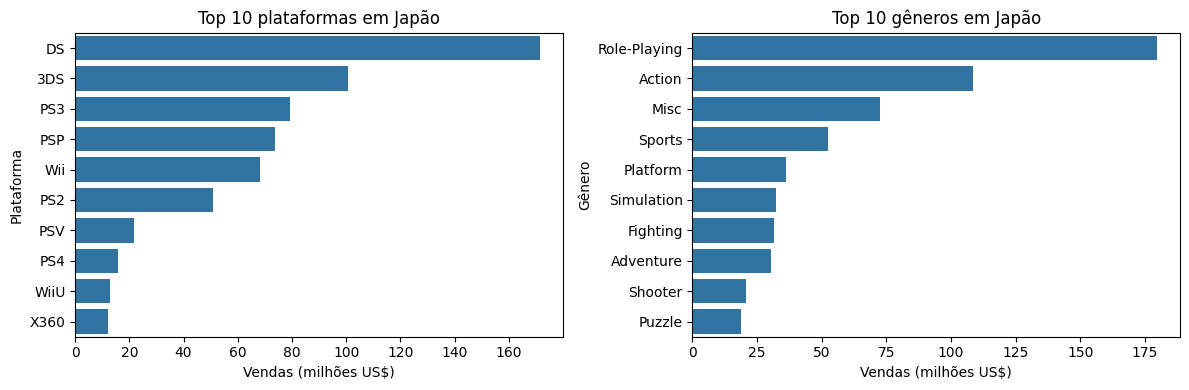

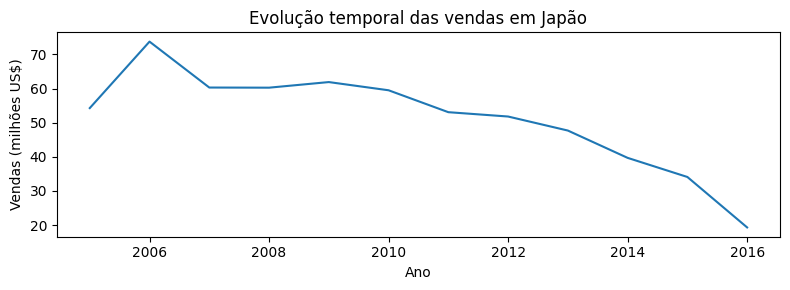

Avaliações dos top jogos em Japão


,Vendas (milhões US$),Nota crítica,Nota usuários
Jogo,,,
New Super Mario Bros.,6.50,89.0,8.5
Pokemon Diamond/Pokemon Pearl,6.04,-,-
Pokemon Black/Pokemon White,5.65,-,-
Animal Crossing: Wild World,5.33,86.0,8.7
Brain Age 2: More Training in Minutes a Day,5.32,77.0,7.1
Monster Hunter Freedom 3,4.87,-,-
New Super Mario Bros. Wii,4.70,87.0,8.4
Animal Crossing: New Leaf,4.39,88.0,8.7
Dragon Quest IX: Sentinels of the Starry Skies,4.35,87.0,8.8


In [67]:
plot_region_profile(profile_jp, 'Japão', 'jp_sales')

O mercado japonês se mostra claramente dominado por plataformas portáteis (DS, 3DS, PSP), enquanto consoles domésticos têm participação menor. O gênero mais lucrativo é Role-Playing, seguido por Action, refletindo a forte tradição do país em RPGs e títulos de narrativa longa. As vendas atingem pico entre 2006–2009 e caem de forma consistente após 2011, indicando declínio do mercado doméstico tradicional e migração do público japonês para jogos mobile. Os jogos mais vendidos reforçam esse padrão, com forte presença de Pokémon e Mario.

### América do Norte

In [60]:
# perfil américa do norte
profile_na = {
    # top 10 plataformas por vendas
    "top_platforms": (
        df_2005_2016
        .groupby("platform")["na_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # top 10 gêneros por vendas
    "top_genres": (
        df_2005_2016
        .groupby("genre")["na_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # vendas por ano (em ordem cronológica)
    "sales_by_year": (
        df_2005_2016
        .groupby("year_of_release")["na_sales"]
        .sum()
        .sort_index() 
    ),

    # top 10 jogos (vendas + scores)
    "top_games_scores": (
        df_2005_2016
        .loc[df_2005_2016["jp_sales"] > 0, ["name", "na_sales", "critic_score", "user_score"]]
        .groupby("name")
        .agg(
            na_sales=("na_sales", "sum"),
            critic_score=("critic_score", "mean"),
            user_score=("user_score", "mean"),
        )
        .sort_values("na_sales", ascending=False)
        .head(10)
    ),
}

# profile_na

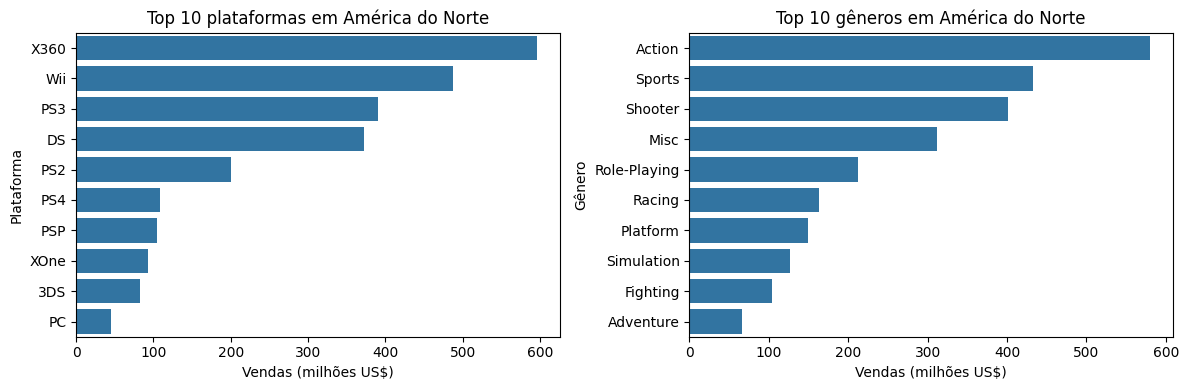

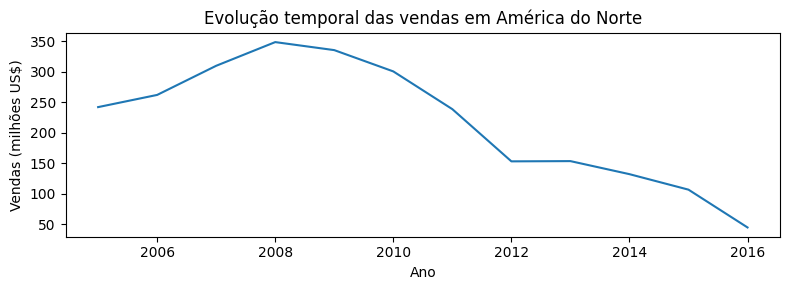

Avaliações dos top jogos em América do Norte


,Vendas (milhões US$),Nota crítica,Nota usuários
Jogo,,,
Wii Sports,41.36,76.0,8.00
Grand Theft Auto V,20.64,97.0,8.20
Call of Duty: Black Ops,15.69,87.5,6.35
Mario Kart Wii,15.68,82.0,8.30
Wii Sports Resort,15.61,80.0,8.00
Kinect Adventures!,15.00,61.0,6.30
Call of Duty: Modern Warfare 3,14.58,88.0,3.30
New Super Mario Bros. Wii,14.44,87.0,8.40
Wii Play,13.96,58.0,6.60


In [61]:
plot_region_profile(profile_na, 'América do Norte', 'na_sales')

A América do Norte apresenta o mercado mais robusto em volume, com X360, Wii e PS3 dominando amplamente as vendas. Os gêneros favoritos são Action, Sports e Shooter, impulsionados por grandes franquias anuais e títulos de alto apelo competitivo. As vendas atingem seu ápice em 2008–2010, declinando depois de 2012 com o fim da geração X360/PS3 e a transição gradual para novas plataformas. O top de jogos da região destaca sobretudo títulos multiplayer e familiares, como Wii Sports, GTA V e Call of Duty.

### Europa

In [62]:
# perfil europa
profile_eu = {
    # top 10 plataformas por vendas
    "top_platforms": (
        df_2005_2016
        .groupby("platform")["eu_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # top 10 gêneros por vendas
    "top_genres": (
        df_2005_2016
        .groupby("genre")["eu_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # vendas por ano (em ordem cronológica)
    "sales_by_year": (
        df_2005_2016
        .groupby("year_of_release")["eu_sales"]
        .sum()
        .sort_index() 
    ),

    # top 10 jogos (vendas + scores)
    "top_games_scores": (
        df_2005_2016
        .loc[df_2005_2016["eu_sales"] > 0, ["name", "eu_sales", "critic_score", "user_score"]]
        .groupby("name")
        .agg(
            eu_sales=("eu_sales", "sum"),
            critic_score=("critic_score", "mean"),
            user_score=("user_score", "mean"),
        )
        .sort_values("eu_sales", ascending=False)
        .head(10)
    ),
}

# profile_eu

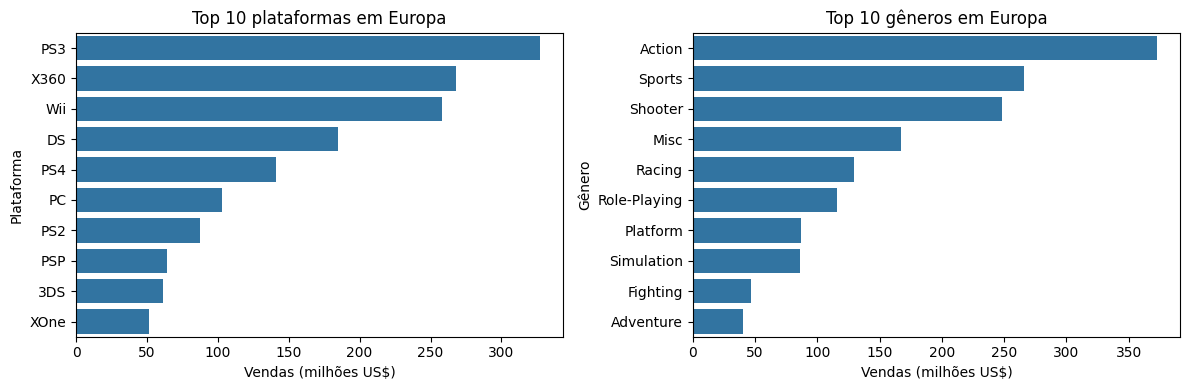

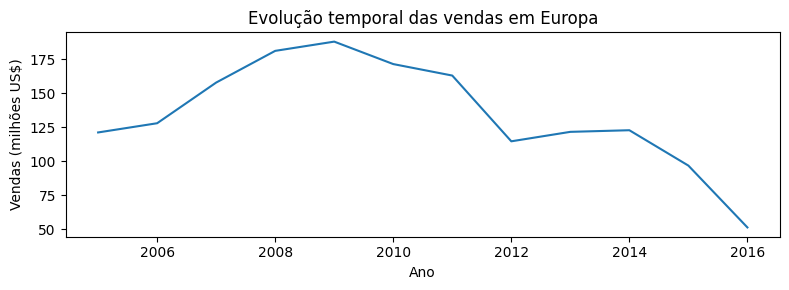

Avaliações dos top jogos em Europa


,Vendas (milhões US$),Nota crítica,Nota usuários
Jogo,,,
Wii Sports,28.96,76.0,8.0
Grand Theft Auto V,23.42,96.8,8.08
Mario Kart Wii,12.76,82.0,8.3
FIFA 15,12.02,82.0,4.225
Call of Duty: Modern Warfare 3,11.15,81.0,2.725
FIFA 16,11.09,82.333333,3.84
FIFA 14,10.96,86.4,4.3375
Nintendogs,10.95,-,-
Wii Sports Resort,10.93,80.0,8.0


In [63]:
plot_region_profile(profile_eu, 'Europa', 'eu_sales')

A Europa apresenta composição semelhante à América do Norte, mas com maior peso para o PS3 e preferência mais equilibrada entre PS3, X360 e Wii. Os gêneros mais vendidos seguem a mesma lógica — Action, Sports e Shooter — com destaque para FIFA, indicando a força do futebol na região. O comportamento temporal mostra pico entre 2008–2010, com queda acentuada após 2011, refletindo a saturação da geração anterior e o ritmo mais lento de adoção de novas plataformas. Os jogos mais vendidos confirmam a popularidade de Wii Sports, GTA V, Call of Duty e especialmente títulos da série FIFA.

### Resto do Mundo

In [64]:
# perfil resto do mundo
profile_row = {
    # top 10 plataformas por vendas
    "top_platforms": (
        df_2005_2016
        .groupby("platform")["row_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # top 10 gêneros por vendas
    "top_genres": (
        df_2005_2016
        .groupby("genre")["row_sales"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    ),

    # vendas por ano (em ordem cronológica)
    "sales_by_year": (
        df_2005_2016
        .groupby("year_of_release")["row_sales"]
        .sum()
        .sort_index() 
    ),

    # top 10 jogos (vendas + scores)
    "top_games_scores": (
        df_2005_2016
        .loc[df_2005_2016["row_sales"] > 0, ["name", "row_sales", "critic_score", "user_score"]]
        .groupby("name")
        .agg(
            row_sales=("row_sales", "sum"),
            critic_score=("critic_score", "mean"),
            user_score=("user_score", "mean"),
        )
        .sort_values("row_sales", ascending=False)
        .head(10)
    ),
}

# profile_row

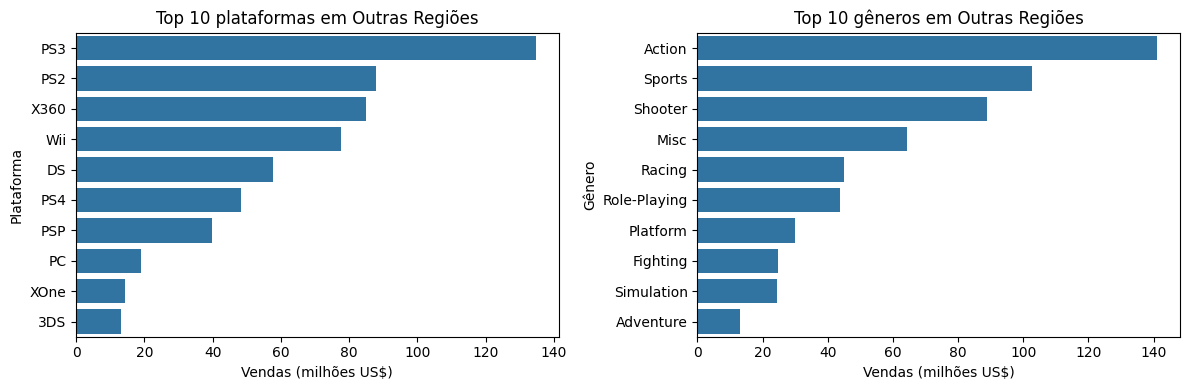

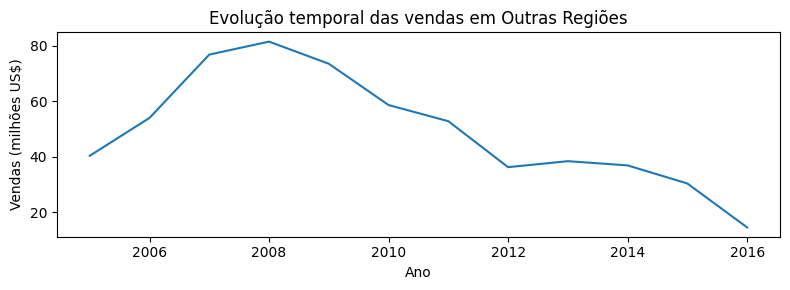

Avaliações dos top jogos em Outras Regiões


,Vendas (milhões US$),Nota crítica,Nota usuários
Jogo,,,
Wii Sports,8.45,76.0,8.0
Grand Theft Auto V,7.90,96.8,8.08
Call of Duty: Black Ops II,3.76,80.25,5.3
FIFA Soccer 08,3.52,78.0,7.0
Pro Evolution Soccer 2008,3.51,79.0,7.4
Call of Duty: Black Ops 3,3.49,-,-
Mario Kart Wii,3.29,82.0,8.3
Call of Duty: Modern Warfare 3,3.29,81.0,2.725
Call of Duty: Ghosts,3.08,73.8,3.32


In [65]:
plot_region_profile(profile_row, 'Outras Regiões', 'row_sales')

Em mercados menores e mais heterogêneos, como América Latina, Oriente Médio e partes da Ásia/Oceania, as vendas são menores em volume, mas seguem padrões próximos aos da Europa. PS3, PS2 e X360 lideram, sugerindo maior retenção de consoles mais antigos devido ao custo de hardware. Action, Sports e Shooter também dominam os gêneros mais rentáveis. O pico ocorre entre 2007–2009, seguido por queda contínua, indicando maturidade tardia do mercado e menor velocidade de atualização tecnológica. O top de jogos reflete forte presença de Wii Sports, GTA V e Call of Duty.

### Conclusão geral:

In [71]:
# criar uma tabela agregada pequena para comparar as regiões
# COLUNAS: region - top plataform - top genre - padrão temporal (pico vendas)

# criando um dicionário com os perfis regionais
regions = {
    "Japão": profile_jp,
    "América do Norte": profile_na,
    "Europa": profile_eu,
    "Outras Regiões": profile_row
}

# criando a tabela agregada
comparison_table = []

for region_name, profile in regions.items():

    row = {
        "Região": region_name,
        "Top plataformas": ", ".join(profile["top_platforms"].head(3).index),
        "Top gêneros": ", ".join(profile["top_genres"].head(3).index),
        "Ano de pico": profile["sales_by_year"].idxmax(),
        "Vendas no pico (milhões US$)": round(profile["sales_by_year"].max(), 2),
    }

    comparison_table.append(row)

# convertendo para DataFrame
comparison_df = pd.DataFrame(comparison_table)

display(comparison_df)

,Região,Top plataformas,Top gêneros,Ano de pico,Vendas no pico (milhões US$)
0,Japão,"DS, 3DS, PS3","Role-Playing, Action, Misc",2006,73.74
1,América do Norte,"X360, Wii, PS3","Action, Sports, Shooter",2008,348.69
2,Europa,"PS3, X360, Wii","Action, Sports, Shooter",2009,187.94
3,Outras Regiões,"PS3, PS2, X360","Action, Sports, Shooter",2008,81.42


A análise das quatro regiões mostra que o mercado global de videogames apresenta padrões semelhantes, mas com características regionais marcantes. América do Norte e Europa compartilham comportamentos quase idênticos: dominância de X360/PS3/Wii, preferência clara por gêneros Action, Sports e Shooter, e um ciclo de vendas que atinge seu ápice entre 2008 e 2010 — impulsionado por franquias de apelo massivo e pela força da geração PS3/X360/Wii.

O Japão, por outro lado, se distancia completamente do padrão ocidental: o consumo é fortemente concentrado em plataformas portáteis e o gênero Role-Playing domina amplamente o mercado. A queda acentuada das vendas após 2011 reflete a migração do público japonês para o mobile e o declínio dos consoles tradicionais.

Nas “Outras Regiões”, observa-se um comportamento intermediário: preferência similar à Europa em termos de gêneros, mas com maior dependência de plataformas antigas (PS2 e PS3), sugerindo maturidade tardia do mercado e menor velocidade de adoção tecnológica.

Em conjunto, esses perfis revelam que, embora os gêneros Action, Sports e Shooter sejam universalmente fortes, o desempenho por plataforma e a velocidade de evolução do mercado variam substancialmente entre regiões — ponto essencial para seguir com as análises de previsão.

## Etapa 5: Testar as hipóteses

## Etapa 6: Conclusão geral